#Simulation de la propagation de rumeurs sur Twitter (X)
Notre objectif est d'étudier comment une information (rumeur, fake news) se propage sur un réseau social simulé. Comprendre l’effet des utilisateurs influents, des probabilités de transmission et des stratégies de blocage. Comparer différents modèles de propagation.

Projet à rendre la 1ère semaine après les vacances, sur github avec documentation propre. IA autorisée mais quand c'est bien utilisé

Simulation initialisée avec 100 utilisateurs.
Patient Zéro : Utilisateur n°65


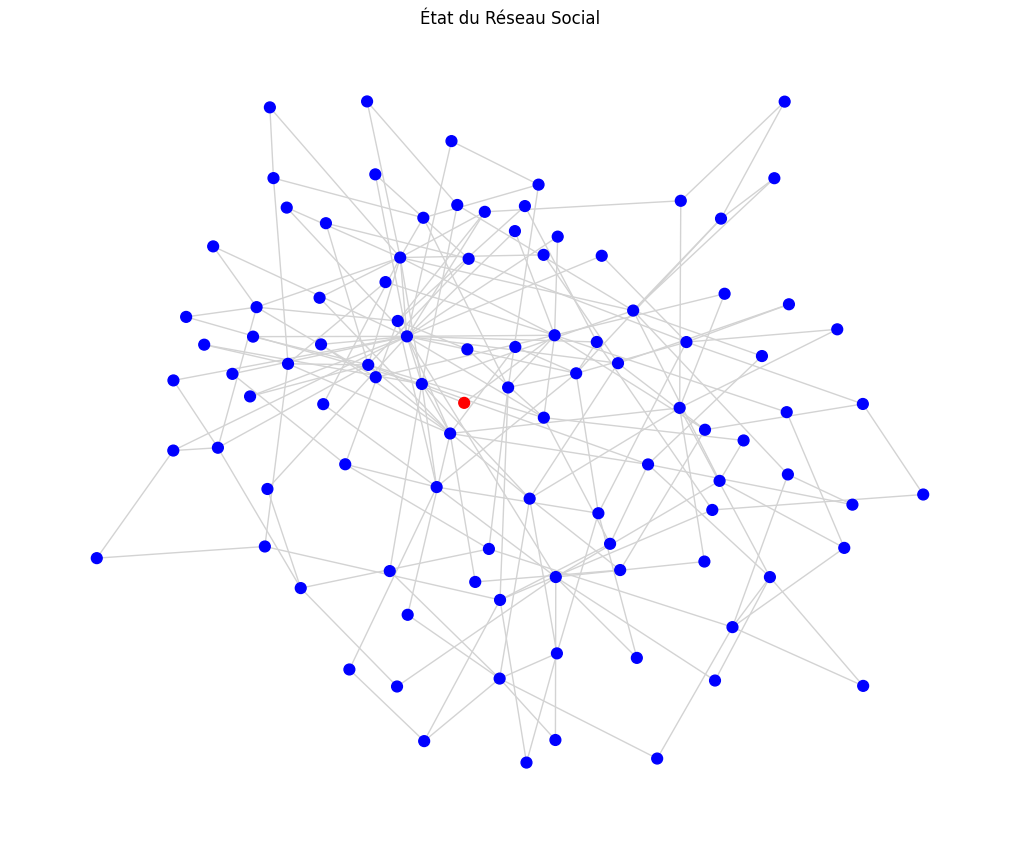

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class SimulationRumeur:
    def __init__(self, n_utilisateurs, beta, mu):
        """
        Constructeur de la simulation.
        :param n_utilisateurs: Nombre total de noeuds (N)
        :param beta: Probabilité de contamination (S -> I)
        :param mu: Probabilité de guérison/arrêt (I -> R)
        """
        self.beta = beta
        self.mu = mu
        self.n_utilisateurs = n_utilisateurs

        # --- 1. CRÉATION DU GRAPHE (Maths : Structure Scale-Free) ---
        # On utilise le modèle Barabási-Albert pour simuler Twitter.
        # m=2 signifie que chaque nouvel arrivant se connecte à 2 personnes existantes.
        self.graphe = nx.barabasi_albert_graph(n=n_utilisateurs, m=2)

        # --- 2. INITIALISATION DES ÉTATS (Maths : État initial t=0) ---
        # On crée un attribut 'etat' pour chaque noeud, réglé sur 'S' (Sain)
        nx.set_node_attributes(self.graphe, 'S', 'etat')

        # --- 3. LE PATIENT ZÉRO ---
        # On choisit un noeud au hasard pour lancer la rumeur
        all_nodes = list(self.graphe.nodes())
        patient_zero = random.choice(all_nodes)

        # On change son état à 'I' (Infecté)
        self.graphe.nodes[patient_zero]['etat'] = 'I'

        print(f"Simulation initialisée avec {n_utilisateurs} utilisateurs.")
        print(f"Patient Zéro : Utilisateur n°{patient_zero}")

    def afficher_reseau(self):
        """
        Fonction pour visualiser le graphe avec des couleurs selon l'état.
        """
        couleurs = []
        # On parcourt tous les noeuds pour définir leur couleur
        for node in self.graphe.nodes():
            etat = self.graphe.nodes[node]['etat']
            if etat == 'S':
                couleurs.append('blue')  # Sain = Bleu
            elif etat == 'I':
                couleurs.append('red')   # Infecté = Rouge
            else:
                couleurs.append('grey')  # Rétabli = Gris

        plt.figure(figsize=(10, 8))
        # spring_layout est un algorithme physique pour espacer les noeuds joliment
        pos = nx.spring_layout(self.graphe, seed=42)

        nx.draw(self.graphe, pos,
                node_color=couleurs,
                node_size=60,
                with_labels=False,
                edge_color="lightgray")

        plt.title("État du Réseau Social")
        plt.show()

# --- ZONE DE TEST ---
# On crée une simulation avec 100 personnes
# Beta = 30% (virulent), Mu = 10% (persistant)
simu = SimulationRumeur(n_utilisateurs=100, beta=0.3, mu=0.1)

# On affiche l'état initial
simu.afficher_reseau()

Ici, on simule un réseau.

Le point rouge représente le "patient zéro".

La majorité des points sont bleus (=sains).
Au centre on remarque qu'il y a des points avec beaucoup de lignes (=connexions), tandis que les points sur les bords en ont peu (1 à 2 lignes).
C'est la signature du modèle Barabási-Albert.

Simulation initialisée avec 200 utilisateurs.
Patient Zéro : Utilisateur n°50
État initial :


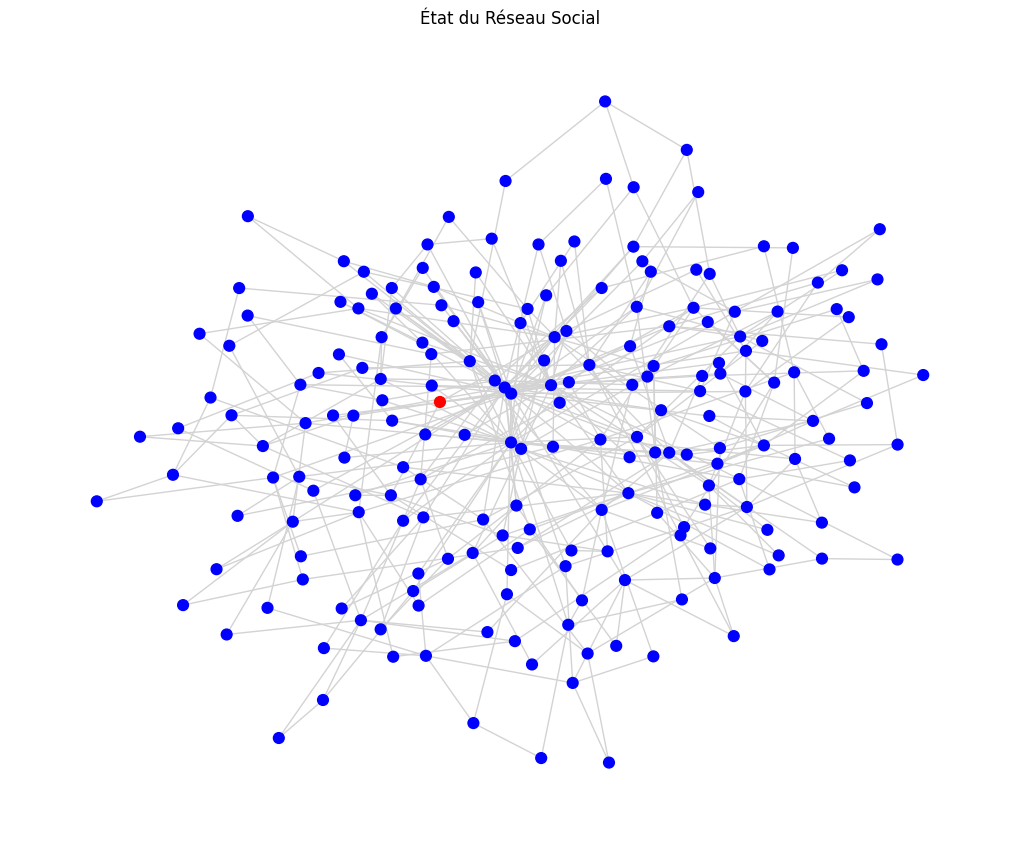

Lancement de la simulation...
Temps t=1 : 199 Sains, 1 Infectés, 0 Rétablis
Temps t=2 : 198 Sains, 2 Infectés, 0 Rétablis
Temps t=3 : 196 Sains, 4 Infectés, 0 Rétablis
Temps t=4 : 179 Sains, 20 Infectés, 1 Rétablis
Temps t=5 : 160 Sains, 37 Infectés, 3 Rétablis
Temps t=6 : 137 Sains, 60 Infectés, 3 Rétablis
Temps t=7 : 117 Sains, 78 Infectés, 5 Rétablis
Temps t=8 : 81 Sains, 111 Infectés, 8 Rétablis
Temps t=9 : 63 Sains, 122 Infectés, 15 Rétablis
Temps t=10 : 40 Sains, 137 Infectés, 23 Rétablis
Temps t=11 : 26 Sains, 139 Infectés, 35 Rétablis
Temps t=12 : 17 Sains, 144 Infectés, 39 Rétablis
Temps t=13 : 13 Sains, 140 Infectés, 47 Rétablis
Temps t=14 : 9 Sains, 133 Infectés, 58 Rétablis
Temps t=15 : 9 Sains, 128 Infectés, 63 Rétablis
État final :


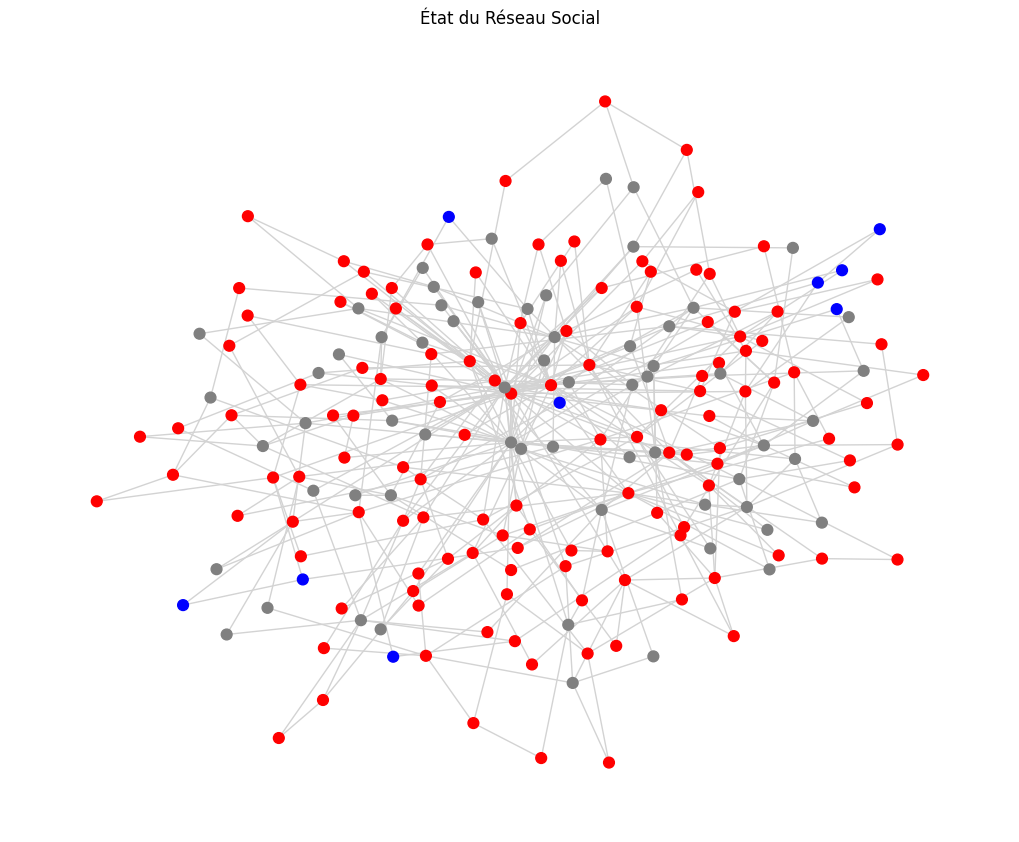

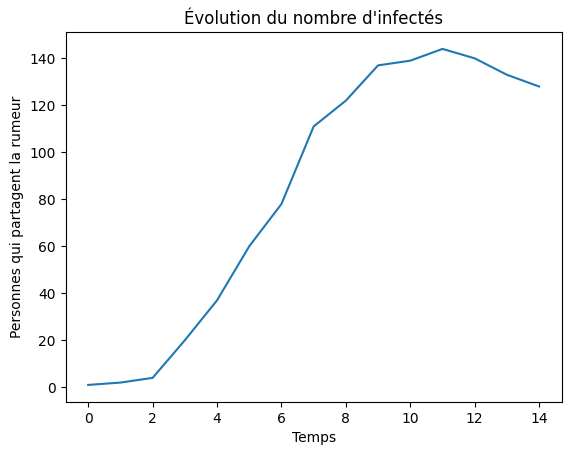

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class SimulationRumeur:
    def __init__(self, n_utilisateurs, beta, mu):
        """
        Constructeur de la simulation.
        :param n_utilisateurs: Nombre total de noeuds (N)
        :param beta: Probabilité de contamination (S -> I)
        :param mu: Probabilité de guérison/arrêt (I -> R)
        """
        self.beta = beta
        self.mu = mu
        self.n_utilisateurs = n_utilisateurs

        # --- 1. CRÉATION DU GRAPHE (Maths : Structure Scale-Free) ---
        # On utilise le modèle Barabási-Albert pour simuler Twitter.
        # m=2 signifie que chaque nouvel arrivant se connecte à 2 personnes existantes.
        self.graphe = nx.barabasi_albert_graph(n=n_utilisateurs, m=2)

        # --- 2. INITIALISATION DES ÉTATS (Maths : État initial t=0) ---
        # On crée un attribut 'etat' pour chaque noeud, réglé sur 'S' (Sain)
        nx.set_node_attributes(self.graphe, 'S', 'etat')

        # --- 3. LE PATIENT ZÉRO ---
        # On choisit un noeud au hasard pour lancer la rumeur
        all_nodes = list(self.graphe.nodes())
        patient_zero = random.choice(all_nodes)

        # On change son état à 'I' (Infecté)
        self.graphe.nodes[patient_zero]['etat'] = 'I'

        print(f"Simulation initialisée avec {n_utilisateurs} utilisateurs.")
        print(f"Patient Zéro : Utilisateur n°{patient_zero}")

    def afficher_reseau(self):
        """
        Fonction pour visualiser le graphe avec des couleurs selon l'état.
        """
        couleurs = []
        # On parcourt tous les noeuds pour définir leur couleur
        for node in self.graphe.nodes():
            etat = self.graphe.nodes[node]['etat']
            if etat == 'S':
                couleurs.append('blue')  # Sain = Bleu
            elif etat == 'I':
                couleurs.append('red')   # Infecté = Rouge
            else:
                couleurs.append('grey')  # Rétabli = Gris

        plt.figure(figsize=(10, 8))
        # spring_layout est un algorithme physique pour espacer les noeuds joliment
        pos = nx.spring_layout(self.graphe, seed=42)

        nx.draw(self.graphe, pos,
                node_color=couleurs,
                node_size=60,
                with_labels=False,
                edge_color="lightgray")

        plt.title("État du Réseau Social")
        plt.show()
    def step(self):
        """
        Fait avancer la simulation d'un pas de temps (t -> t+1).
        Retourne les statistiques actuelles (nb_S, nb_I, nb_R).
        """
        # On prépare des listes pour stocker les changements.
        # IMPORTANT : On ne modifie pas le graphe directement dans la boucle,
        # sinon un noeud infecté maintenant pourrait contaminer son voisin
        # dans le MEME tour, ce qui fausserait le temps.
        a_infecter = []
        a_retablir = []

        # On parcourt tous les noeuds
        for node in self.graphe.nodes():
            etat_actuel = self.graphe.nodes[node]['etat']

            # --- CAS 1 : L'utilisateur est SAIN (S) ---
            if etat_actuel == 'S':
                # On compte combien de voisins sont infectés
                voisins = list(self.graphe.neighbors(node))
                k_infectes = 0
                for v in voisins:
                    if self.graphe.nodes[v]['etat'] == 'I':
                        k_infectes += 1

                # S'il a des voisins infectés, on calcule le risque
                if k_infectes > 0:
                    # Formule Maths : P = 1 - (1 - beta)^k
                    proba_contagion = 1 - (1 - self.beta)**k_infectes

                    # Lancer de dé
                    if random.random() < proba_contagion:
                        a_infecter.append(node)

            # --- CAS 2 : L'utilisateur est INFECTÉ (I) ---
            elif etat_actuel == 'I':
                # Il a une chance de guérir/s'arrêter
                # Formule Maths : P = mu
                if random.random() < self.mu:
                    a_retablir.append(node)

        # --- APPLICATION DES CHANGEMENTS ---
        # Une fois la boucle finie, on met à jour le graphe
        for node in a_infecter:
            self.graphe.nodes[node]['etat'] = 'I'

        for node in a_retablir:
            self.graphe.nodes[node]['etat'] = 'R'

        # --- COMPTABILITÉ (Pour les graphiques plus tard) ---
        nb_S = 0
        nb_I = 0
        nb_R = 0
        for node in self.graphe.nodes():
            et = self.graphe.nodes[node]['etat']
            if et == 'S': nb_S += 1
            elif et == 'I': nb_I += 1
            else: nb_R += 1

        return nb_S, nb_I, nb_R


# --- ZONE DE TEST MISE À JOUR ---

# 1. Création (N=200, Beta=20%, Mu=5%)
simu = SimulationRumeur(n_utilisateurs=200, beta=0.2, mu=0.05)

# 2. On affiche l'état de départ
print("État initial :")
simu.afficher_reseau()

# 3. On lance la boucle temporelle (ex: 15 tours)
print("Lancement de la simulation...")
historique_I = []

for t in range(15):
    # On avance d'un pas
    s, i, r = simu.step()
    historique_I.append(i) # On stocke le nombre d'infectés
    print(f"Temps t={t+1} : {s} Sains, {i} Infectés, {r} Rétablis")

# 4. On affiche l'état final
print("État final :")
simu.afficher_reseau()

# Petit bonus : courbe rapide
plt.plot(historique_I)
plt.title("Évolution du nombre d'infectés")
plt.xlabel("Temps")
plt.ylabel("Personnes qui partagent la rumeur")
plt.show()

Simulation initialisée avec 500 utilisateurs.
Patient Zéro : Utilisateur n°259
--- Démarrage de la simulation ---


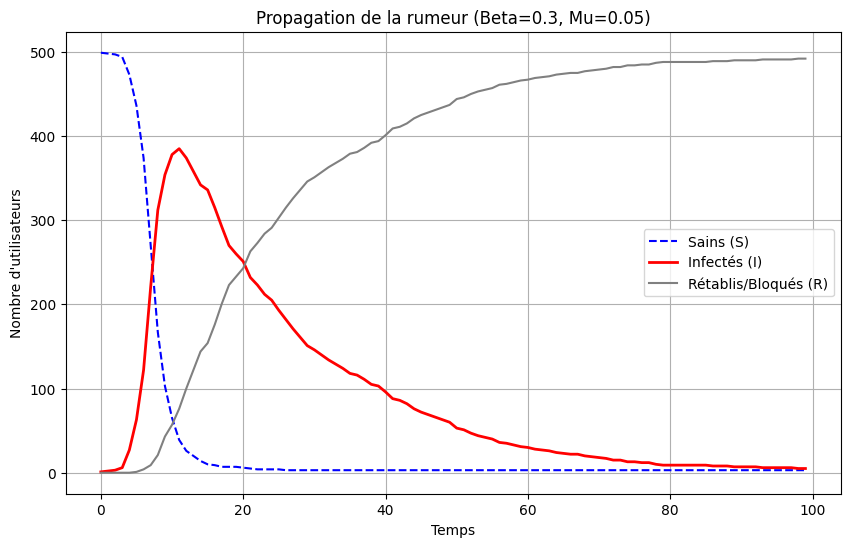

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class SimulationRumeur:
    def __init__(self, n_utilisateurs, beta, mu):
        """
        Constructeur de la simulation.
        :param n_utilisateurs: Nombre total de noeuds (N)
        :param beta: Probabilité de contamination (S -> I)
        :param mu: Probabilité de guérison/arrêt (I -> R)
        """
        self.beta = beta
        self.mu = mu
        self.n_utilisateurs = n_utilisateurs

        # --- 1. CRÉATION DU GRAPHE (Maths : Structure Scale-Free) ---
        # On utilise le modèle Barabási-Albert pour simuler Twitter.
        # m=2 signifie que chaque nouvel arrivant se connecte à 2 personnes existantes.
        self.graphe = nx.barabasi_albert_graph(n=n_utilisateurs, m=2)

        # --- 2. INITIALISATION DES ÉTATS (Maths : État initial t=0) ---
        # On crée un attribut 'etat' pour chaque noeud, réglé sur 'S' (Sain)
        nx.set_node_attributes(self.graphe, 'S', 'etat')

        # --- 3. LE PATIENT ZÉRO ---
        # On choisit un noeud au hasard pour lancer la rumeur
        all_nodes = list(self.graphe.nodes())
        patient_zero = random.choice(all_nodes)

        # On change son état à 'I' (Infecté)
        self.graphe.nodes[patient_zero]['etat'] = 'I'

        print(f"Simulation initialisée avec {n_utilisateurs} utilisateurs.")
        print(f"Patient Zéro : Utilisateur n°{patient_zero}")

    def afficher_reseau(self):
        """
        Fonction pour visualiser le graphe avec des couleurs selon l'état.
        """
        couleurs = []
        # On parcourt tous les noeuds pour définir leur couleur
        for node in self.graphe.nodes():
            etat = self.graphe.nodes[node]['etat']
            if etat == 'S':
                couleurs.append('blue')  # Sain = Bleu
            elif etat == 'I':
                couleurs.append('red')   # Infecté = Rouge
            else:
                couleurs.append('grey')  # Rétabli = Gris

        plt.figure(figsize=(10, 8))
        # spring_layout est un algorithme physique pour espacer les noeuds joliment
        pos = nx.spring_layout(self.graphe, seed=42)

        nx.draw(self.graphe, pos,
                node_color=couleurs,
                node_size=60,
                with_labels=False,
                edge_color="lightgray")

        plt.title("État du Réseau Social")
        plt.show()
    def step(self):
        """
        Fait avancer la simulation d'un pas de temps (t -> t+1).
        Retourne les statistiques actuelles (nb_S, nb_I, nb_R).
        """
        # On prépare des listes pour stocker les changements.
        # IMPORTANT : On ne modifie pas le graphe directement dans la boucle,
        # sinon un noeud infecté maintenant pourrait contaminer son voisin
        # dans le MEME tour, ce qui fausserait le temps.
        a_infecter = []
        a_retablir = []

        # On parcourt tous les noeuds
        for node in self.graphe.nodes():
            etat_actuel = self.graphe.nodes[node]['etat']

            # --- CAS 1 : L'utilisateur est SAIN (S) ---
            if etat_actuel == 'S':
                # On compte combien de voisins sont infectés
                voisins = list(self.graphe.neighbors(node))
                k_infectes = 0
                for v in voisins:
                    if self.graphe.nodes[v]['etat'] == 'I':
                        k_infectes += 1

                # S'il a des voisins infectés, on calcule le risque
                if k_infectes > 0:
                    # Formule Maths : P = 1 - (1 - beta)^k
                    proba_contagion = 1 - (1 - self.beta)**k_infectes

                    # Lancer de dé
                    if random.random() < proba_contagion:
                        a_infecter.append(node)

            # --- CAS 2 : L'utilisateur est INFECTÉ (I) ---
            elif etat_actuel == 'I':
                # Il a une chance de guérir/s'arrêter
                # Formule Maths : P = mu
                if random.random() < self.mu:
                    a_retablir.append(node)

        # --- APPLICATION DES CHANGEMENTS ---
        # Une fois la boucle finie, on met à jour le graphe
        for node in a_infecter:
            self.graphe.nodes[node]['etat'] = 'I'

        for node in a_retablir:
            self.graphe.nodes[node]['etat'] = 'R'

        # --- COMPTABILITÉ (Pour les graphiques plus tard) ---
        nb_S = 0
        nb_I = 0
        nb_R = 0
        for node in self.graphe.nodes():
            et = self.graphe.nodes[node]['etat']
            if et == 'S': nb_S += 1
            elif et == 'I': nb_I += 1
            else: nb_R += 1

        return nb_S, nb_I, nb_R

    def run(self, max_tours=50):
        """
        Lance la simulation complète et affiche les courbes.
        """
        # Listes pour stocker l'historique (l'axe Y du graphique)
        donnees_S = []
        donnees_I = []
        donnees_R = []
        temps = []

        print("--- Démarrage de la simulation ---")

        for t in range(max_tours):
            # 1. On avance d'un pas
            s, i, r = self.step()

            # 2. On enregistre les données
            donnees_S.append(s)
            donnees_I.append(i)
            donnees_R.append(r)
            temps.append(t)

            # 3. Condition d'arrêt précoce : Si plus personne n'est infecté
            if i == 0:
                print(f"La rumeur s'est éteinte au temps t={t}.")
                break

        # --- CRÉATION DU GRAPHIQUE FINAL (Analyse) ---
        plt.figure(figsize=(10, 6))

        # Courbe des Sains (Blue)
        plt.plot(temps, donnees_S, label="Sains (S)", color='blue', linestyle='--')

        # Courbe des Infectés (Rouge) - C'est la plus importante !
        plt.plot(temps, donnees_I, label="Infectés (I)", color='red', linewidth=2)

        # Courbe des Rétablis (Gris)
        plt.plot(temps, donnees_R, label="Rétablis/Bloqués (R)", color='grey')

        plt.title(f"Propagation de la rumeur (Beta={self.beta}, Mu={self.mu})")
        plt.xlabel("Temps")
        plt.ylabel("Nombre d'utilisateurs")
        plt.legend()
        plt.grid(True)
        plt.show()

# --- ZONE DE TEST FINALE ---

# 1. On configure une simulation intéressante
# Beta = 0.3 (30% de chance de RT)
# Mu = 0.05 (La rumeur reste longtemps, les gens mettent du temps à s'arrêter)
simu = SimulationRumeur(n_utilisateurs=500, beta=0.3, mu=0.05)

# 2. On lance tout !
simu.run(max_tours=100)

In [ ]:
class SimulationRumeur:
    def __init__(self, n_noeuds, m_links, p_transmission, p_recovery, modele='barabasi'):
        """
        Initialise la simulation.
        :param n_noeuds: Nombre total d'utilisateurs
        :param m_links: Nombre de connexions pour chaque nouveau noeud (densité)
        :param p_transmission: Proba (beta) qu'un I contamine un voisin S
        :param p_recovery: Proba (gamma) qu'un I devienne R (arrête de partager)
        :param modele: Type de graphe ('barabasi', 'erdos', 'watts')
        """
        self.n = n_noeuds
        self.p_trans = p_transmission
        self.p_rec = p_recovery

        # 1. Création du Graphe (Structure)
        if modele == 'barabasi':
            # Scale-free : génère naturellement des "hubs" (influenceurs)
            self.graphe = nx.barabasi_albert_graph(n_noeuds, m_links)
        elif modele == 'erdos':
            # Aléatoire pur (pour comparaison)
            self.graphe = nx.erdos_renyi_graph(n_noeuds, 0.05)
        elif modele == 'watts':
            # Petit monde
            self.graphe = nx.watts_strogatz_graph(n_noeuds, k=4, p=0.1)

        # 2. Initialisation des états
        # 0: Susceptible (S), 1: Infecté (I), 2: Recovered (R)
        self.etats = {i: 0 for i in range(n_noeuds)}

        # On infecte le patient zéro (au hasard ou un influenceur ?)
        # Si on veut cibler le plus gros influenceur
        # On trie les nœuds par degré (nombre d'amis) décroissant
        top_influenceur = sorted(self.graphe.degree, key=lambda x: x[1], reverse=True)[0][0]
        patient_zero = top_influenceur
        self.etats[patient_zero] = 1

        # Historique pour les courbes (S, I, R)
        self.historique = {'S': [], 'I': [], 'R': []}
        self._maj_historique()

    def _maj_historique(self):
        """Compte le nombre de S, I, R à l'instant t"""
        valeurs = list(self.etats.values())
        self.historique['S'].append(valeurs.count(0))
        self.historique['I'].append(valeurs.count(1))
        self.historique['R'].append(valeurs.count(2))

    def step(self):
        """
        Avance la simulation d'un pas de temps (t -> t+1).
        Utilise une mise à jour synchrone.
        """
        nouveaux_etats = self.etats.copy()

        # On parcourt tous les nœuds
        for noeud in self.graphe.nodes():
            etat_actuel = self.etats[noeud]

            # Logique pour un Susceptible (S)
            if etat_actuel == 0:
                # Regarder les voisins
                voisins = list(self.graphe.neighbors(noeud))
                # Compter les voisins infectés
                voisins_infectes = sum([1 for v in voisins if self.etats[v] == 1])

                # Calcul de la probabilité de se faire infecter
                # P(infecté) = 1 - (1 - p_trans)^nombre_voisins_infectés
                # C'est la proba qu'au moins un voisin transmette la rumeur
                if voisins_infectes > 0:
                    proba_infection = 1 - (1 - self.p_trans)**voisins_infectes
                    if random.random() < proba_infection:
                        nouveaux_etats[noeud] = 1 # Devient I

            # Logique pour un Infecté (I)
            elif etat_actuel == 1:
                # Test de récupération (arrête de partager)
                if random.random() < self.p_rec:
                    nouveaux_etats[noeud] = 2 # Devient R

        # Mise à jour globale
        self.etats = nouveaux_etats
        self._maj_historique()

    def run(self, steps=50):
        """Lance la boucle temporelle"""
        for _ in range(steps):
            self.step()
            # Si plus personne n'est infecté, on peut arrêter plus tôt
            if self.historique['I'][-1] == 0:
                break

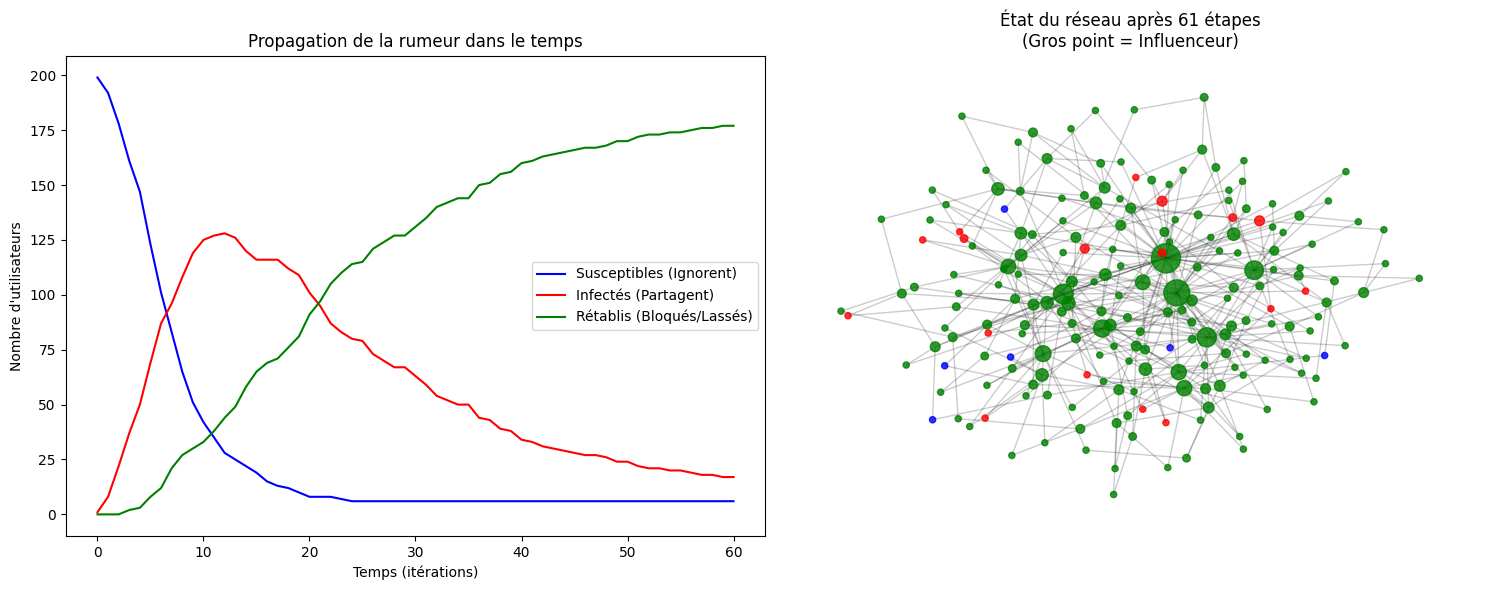

In [ ]:
# --- PARAMÈTRES ---
N_NOEUDS = 200     # Taille du réseau
M_LINKS = 2        # Paramètre Barabási (nouveaux liens par noeud)
P_TRANS = 0.2      # 20% de chance de croire/partager la rumeur
P_REC = 0.05       # 5% de chance de s'ennuyer/passer à autre chose
STEPS = 60         # Durée simulation

# --- LANCEMENT ---
sim = SimulationRumeur(N_NOEUDS, M_LINKS, P_TRANS, P_REC, modele='barabasi')
sim.run(STEPS)

# --- VISUALISATION ---
plt.figure(figsize=(15, 6))

# 1. Courbes d'évolution (S, I, R)
plt.subplot(1, 2, 1)
x = range(len(sim.historique['S']))
plt.plot(x, sim.historique['S'], label='Susceptibles (Ignorent)', color='blue')
plt.plot(x, sim.historique['I'], label='Infectés (Partagent)', color='red')
plt.plot(x, sim.historique['R'], label='Rétablis (Bloqués/Lassés)', color='green')
plt.title("Propagation de la rumeur dans le temps")
plt.xlabel("Temps (itérations)")
plt.ylabel("Nombre d'utilisateurs")
plt.legend()

# 2. Visualisation du Graphe final
plt.subplot(1, 2, 2)
couleurs = ['blue' if s == 0 else 'red' if s == 1 else 'green' for s in sim.etats.values()]
# On dessine les nœuds avec une taille proportionnelle à leur degré (influence)
tailles = [v * 10 for v in dict(sim.graphe.degree()).values()]

pos = nx.spring_layout(sim.graphe, seed=42) # Layout pour écarter les nœuds
nx.draw_networkx_nodes(sim.graphe, pos, node_color=couleurs, node_size=tailles, alpha=0.8)
nx.draw_networkx_edges(sim.graphe, pos, alpha=0.2)
plt.title(f"État du réseau après {len(x)} étapes\n(Gros point = Influenceur)")
plt.axis('off')

plt.tight_layout()
plt.show()